In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os, sys

PATH = "../Data/Images/"

import random as rng
rng.seed(12345)

In [2]:
img1 = cv.imread(f'{PATH}G1.JPG')
img2 = cv.imread(f'{PATH}G2.JPG', cv.COLOR_BGR2GRAY)
img19 = cv.imread(f'{PATH}G19.JPG', cv.COLOR_BGR2GRAY)

In [10]:
# imgray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)



In [44]:
def thresh_callback():
    # Detect edges using Canny
    v = np.median(src_gray)
    sigma=0.33
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    
    blurred_image = cv.GaussianBlur(src_gray.copy(),(5,5),0)
    
    canny_output = cv.Canny(blurred_image, lower, upper)
    # Find contours
    contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_TC89_KCOS)
#     contours, hierarchy = cv.findContours(src_gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Draw contours
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    print(len(contours))
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    # Show in a window
    plt.figure(figsize = (20,20))
    plt.imshow(drawing)
    plt.show()

In [3]:
src_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))

3660


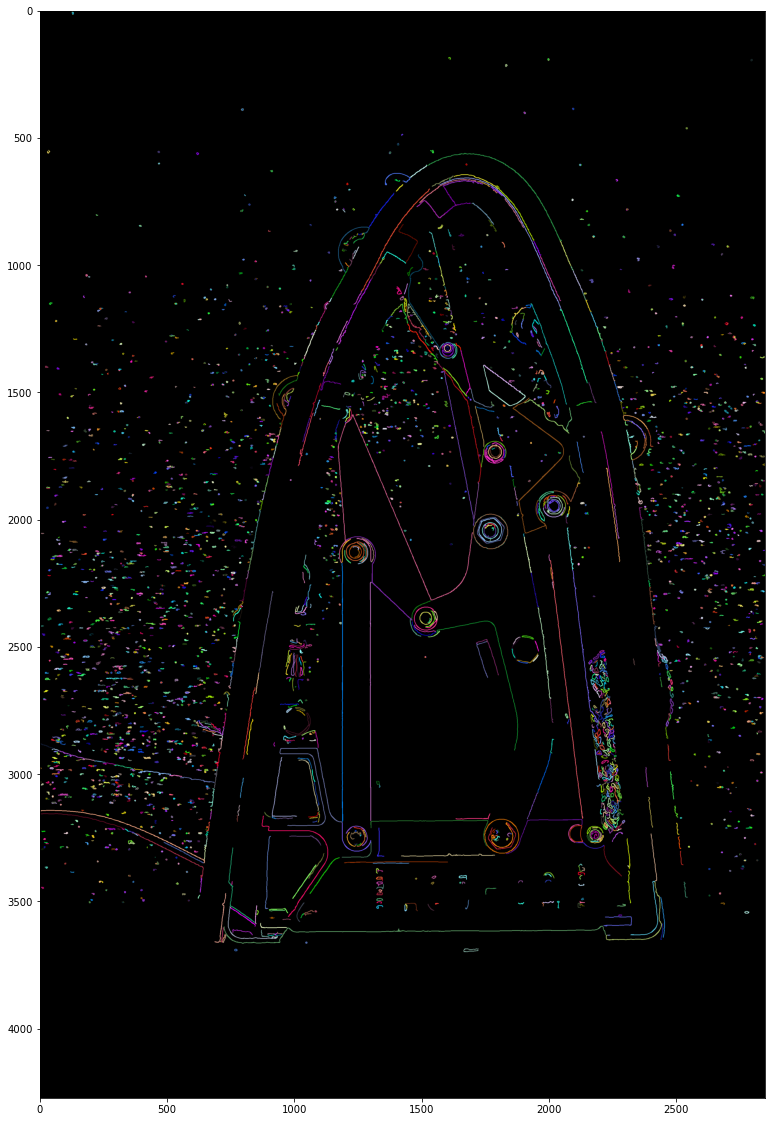

In [45]:
thresh_callback()

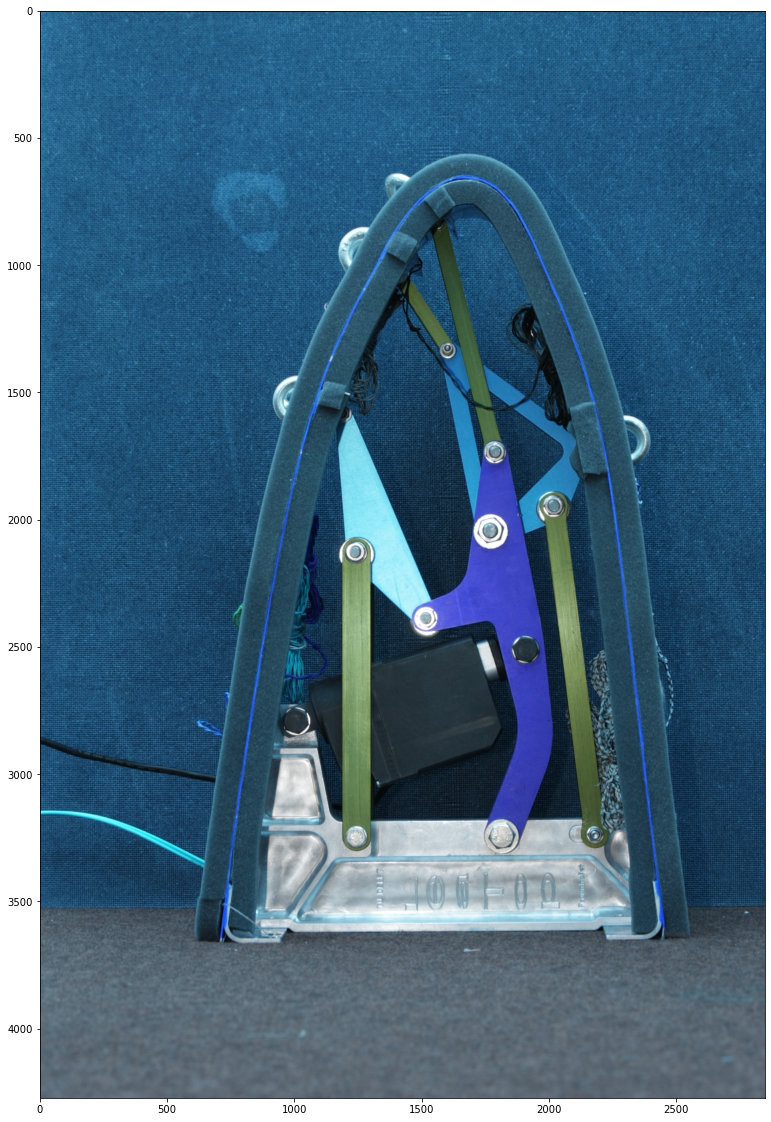

In [19]:
# cv.drawContours(img1, contours, 3, (0,255,0), 3)

# cnt = contours[4]
# cv.drawContours(th2, contours, -1, (0,255,0), 3)

v = np.median(gray_image)

In [27]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Draw contours
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    # Show in a window
    cv.imshow('Contours', drawing)
# Load source image
parser = argparse.ArgumentParser(description='Code for Finding contours in your image tutorial.')
parser.add_argument('--input', help="../Data/Images/", default='G1.JPG')
args = parser.parse_args()
src = cv.imread(cv.samples.findFile(args.input))
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# Create Window
source_window = 'Source'
cv.namedWindow(source_window)
cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny Thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv.waitKey()

usage: ipykernel_launcher.py [-h] [--input INPUT]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/docopol/.local/share/jupyter/runtime/kernel-0d4c3fa6-d828-47bd-be9f-37944b168743.json


SystemExit: 2

/home/docopol/Programs/anaconda3/envs/pygame/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
from wand.image import Image

with Image(filename=f'../Data/Images Calibration/IMG_3534.jpg') as img:
    img.kmeans(number_colors=32, max_iterations=100, tolerance=0.01)
    img.save(filename='quantize_kmeans.jpg')


MissingDelegateError: no decode delegate for this image format `JPG' @ error/constitute.c/ReadImage/737